In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [3]:
df= pd.read_csv('Wholesale customers data.csv', index_col=0)
df

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,,,,,,,
2,3,12669,9656,7561,214,2674,1338
2,3,7057,9810,9568,1762,3293,1776
2,3,6353,8808,7684,2405,3516,7844
1,3,13265,1196,4221,6404,507,1788
2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...
1,3,29703,12051,16027,13135,182,2204
1,3,39228,1431,764,4510,93,2346
2,3,14531,15488,30243,437,14841,1867


In [4]:
df.describe()

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [10]:
plt.rcParams['figure.figsize']=(10,5)
plt.rcParams['figure.dpi']=250

<AxesSubplot:>

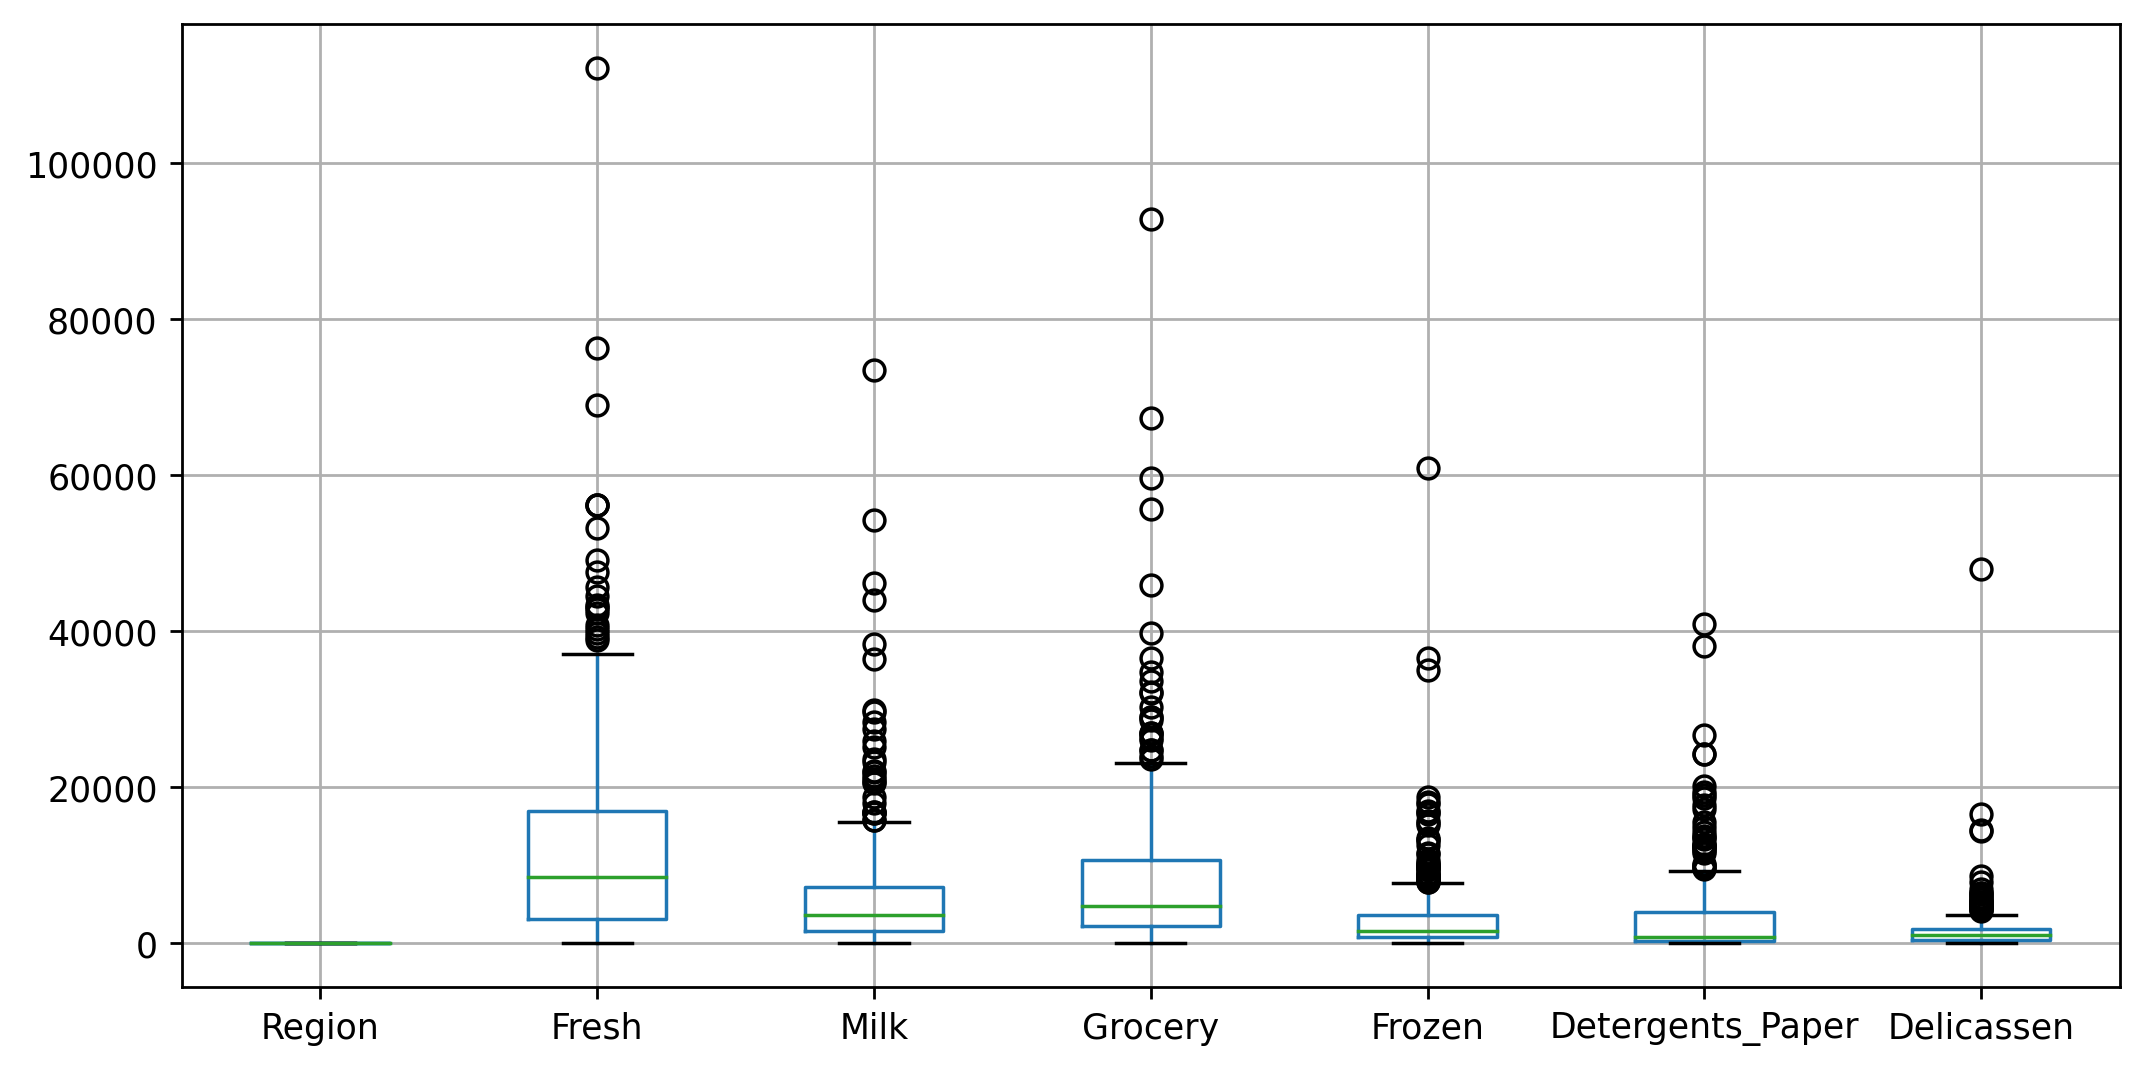

In [11]:
df.boxplot()

In [ ]:
import seaborn as sns

sns.pairplot(df)

In [17]:
sc= StandardScaler()

x= sc.fit_transform(df)
x

array([[ 0.59066829,  0.05293319,  0.52356777, ..., -0.58936716,
        -0.04356873, -0.06633906],
       [ 0.59066829, -0.39130197,  0.54445767, ..., -0.27013618,
         0.08640684,  0.08915105],
       [ 0.59066829, -0.44702926,  0.40853771, ..., -0.13753572,
         0.13323164,  2.24329255],
       ...,
       [ 0.59066829,  0.20032554,  1.31467078, ..., -0.54337975,
         2.51121768,  0.12145607],
       [ 0.59066829, -0.13538389, -0.51753572, ..., -0.41944059,
        -0.56977032,  0.21304614],
       [ 0.59066829, -0.72930698, -0.5559243 , ..., -0.62009417,
        -0.50488752, -0.52286938]])

In [19]:
from sklearn.cluster import DBSCAN

In [20]:
db= DBSCAN()
db.fit(x)

DBSCAN()

In [21]:
db.labels_

array([ 6, -1, -1,  0, -1,  6,  0,  3,  0, -1, -1,  0, -1, -1, -1,  0,  2,
       -1,  6,  0, -1,  0, -1, -1, -1,  0,  0,  0, -1,  1, -1,  0,  0, -1,
        0,  3, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0,
        0, -1,  2,  0,  0, -1, -1,  0,  3,  0, -1, -1, -1,  0, -1, -1, -1,
       -1,  0, -1, -1, -1, -1,  3,  0, -1, -1,  0,  0,  0,  2, -1,  0,  0,
       -1, -1, -1, -1, -1,  0,  0, -1, -1,  2,  0, -1,  0,  0,  0, -1, -1,
        3, -1,  0,  0,  3, -1, -1, -1,  0, -1, -1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0, -1, -1, -1,  0, -1, -1,  1,  0,  0,  0,  0,  0,  0,
       -1, -1, -1,  0,  6, -1, -1,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,
       -1,  0, -1, -1,  0,  3,  2,  3,  0,  0, -1, -1, -1, -1,  0,  0,  0,
        2, -1,  0, -1,  0,  3, -1, -1, -1, -1,  6, -1,  2, -1,  0, -1,  0,
       -1, -1, -1, -1,  0,  0, -1,  0, -1, -1, -1, -1,  4, -1, -1, -1,  4,
        4, -1,  4, -1, -1, -1,  4, -1,  4, -1, -1, -1, -1,  4, -1,  4,  4,
       -1,  5, -1,  4,  4

In [22]:
from sklearn.metrics import silhouette_score

In [23]:
silhouette_score(x,db.labels_)

-0.1313540815329343

In [24]:
db=DBSCAN(eps=1, min_samples=7)

db.fit_predict(x)

array([ 0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0, -1, -1, -1,  0,  0,  0, -1,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0, -1, -1,  0,  0,  0,  0, -1,  0, -1,  0, -1,  0,
        0,  0,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0,  0,  0, -1,  0,  0,
        0,  0,  0, -1,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,
       -1, -1, -1,  0,  0,  0,  0, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0, -1,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0, -1, -1,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,
        0, -1,  0,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  1,  1,  1, -1, -1, -1,  1,
        1, -1,  1,  1,  1, -1,  1, -1,  1,  1,  1,  1, -1,  1, -1,  1,  1,
        1,  1,  1,  1,  1

In [25]:
silhouette_score(x,db.labels_)

0.1194317075194764

In [30]:
df['y']= db.labels_

In [26]:
df

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,,,,,,,
2,3,12669,9656,7561,214,2674,1338
2,3,7057,9810,9568,1762,3293,1776
2,3,6353,8808,7684,2405,3516,7844
1,3,13265,1196,4221,6404,507,1788
2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...
1,3,29703,12051,16027,13135,182,2204
1,3,39228,1431,764,4510,93,2346
2,3,14531,15488,30243,437,14841,1867


In [31]:
df[df['y']==-1]

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,y
Channel,,,,,,,,
2,3,6353,8808,7684,2405,3516,7844,-1
1,3,31276,1917,4469,9408,2381,4334,-1
2,3,26373,36423,22019,5154,4337,16523,-1
2,3,22647,9776,13792,2915,4482,5778,-1
2,3,4113,20484,25957,1158,8604,5206,-1
...,...,...,...,...,...,...,...,...
1,3,11243,2408,2593,15348,108,1886,-1
1,3,31012,16687,5429,15082,439,1163,-1
1,3,8533,5506,5160,13486,1377,1498,-1


In [32]:
df.groupby('y').agg('mean')

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
y,,,,,,,
-1,2.303797,19874.291139,14241.683544,18474.202532,6658.379747,7307.987342,3518.544304
0,3.000000,10614.717949,4256.326007,6039.904762,2195.985348,2098.025641,1127.344322
1,1.000000,8734.724138,3396.879310,4443.603448,2427.500000,1492.258621,967.965517
2,2.000000,10187.666667,2208.933333,4415.900000,2844.633333,1040.466667,969.033333
